In [1]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/sparg2.0")

import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("always")

In [2]:
ts = tskit.load("two_pops.trees")

np.random.seed(1)
keep_nodes = list(np.random.choice(ts.samples(), 50, replace=False))
ts_sim, maps_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_flagged = sparg.add_recomb_node_flags_to_ts(ts=ts_sim)
ts_filtered, maps_filtered = sparg.remove_uninformative_nodes(ts=ts_flagged)#, keep_young_nodes={"below": 1000, "step": 10})

In [3]:
unique_paths = sparg.identify_unique_paths(ts=ts_filtered)

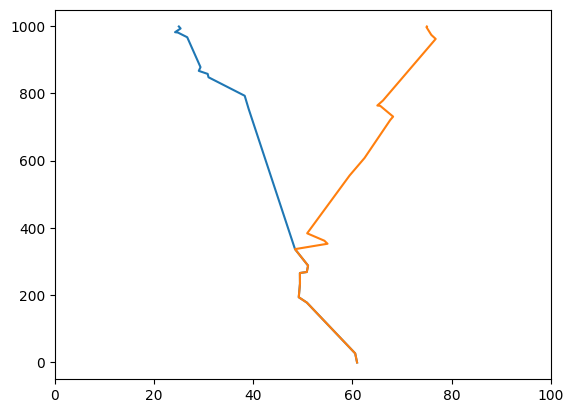

In [4]:
for i,path in enumerate(unique_paths): #3537:3539 #[3485, 3699] #[1799, 1931]
    if i in [3485, 3699]:
        locations = []
        times = []
        for node in path:
            locations.append(ts_filtered.individual(ts_filtered.node(node).individual).location[0])
            times.append(ts_filtered.node(node).time)
        if i == 0:
            plt.plot(locations, times, label="truth")
        else:
            plt.plot(locations, times)
plt.xlim(0,100)
plt.show()

In [5]:
from_nine_nodes = []
from_nine_paths = []
for i,path in enumerate(unique_paths):
    if i in [3485, 3699]:
        from_nine_paths.append(path)
        for node in path:
            if node not in from_nine_nodes:
                from_nine_nodes.append(node)

In [ ]:
dispersal_rate, cov_mat, paths, locations_of_nodes, variances_in_node_locations = sparg.estimate_spatial_parameters(ts=ts_filtered, return_ancestral_node_positions=from_nine_nodes)

Calculating covariance matrix


100%|███████████████████████████████████████| 1037/1037 [05:19<00:00,  3.25it/s]


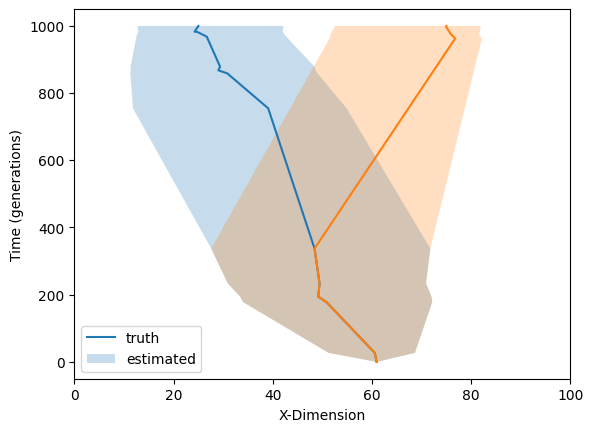

In [8]:
import math

unique_paths = sparg.identify_unique_paths(ts=ts_filtered)
for i,path in enumerate(unique_paths):
    if i in [3485, 3699]:
        locations = []
        times = []
        for node in path:
            locations.append(ts_filtered.individual(ts_filtered.node(node).individual).location[0])
            times.append(ts_filtered.node(node).time)
        if i == 3485:
            plt.plot(locations, times, label="truth")
        else:
            plt.plot(locations, times)

unique_times = list(np.unique(ts_filtered.tables.nodes.time))
for i,p in enumerate(unique_paths):
    if i in [3485, 3699]:
        p_time = []
        p_rank = []
        p_locs = []
        p_error = []
        p_left = []
        p_right = []
        for n in p:
            p_time.append(ts_filtered.node(n).time)
            p_rank.append(unique_times.index(ts_filtered.node(n).time))
            p_locs.append(locations_of_nodes[n][0])
            p_error.append(2*math.sqrt(round(variances_in_node_locations[n][0][0])))    # Error is two standard deviations (95% confidence interval)
            p_left.append(locations_of_nodes[n][0]-(2*math.sqrt(round(variances_in_node_locations[n][0][0]))))
            p_right.append(locations_of_nodes[n][0]+(2*math.sqrt(round(variances_in_node_locations[n][0][0]))))
        if i == 3485:
            plt.fill_betweenx(y=np.array(p_time, dtype="float"), x1=np.array(p_left, dtype="float"), x2=np.array(p_right, dtype="float"), alpha=0.25, label="estimated")
        else:
            plt.fill_betweenx(y=np.array(p_time, dtype="float"), x1=np.array(p_left, dtype="float"), x2=np.array(p_right, dtype="float"), alpha=0.25)

#plt.ylim(-10, 2000)
plt.xlim(0, 100)
plt.legend(loc="lower left")
plt.xlabel("X-Dimension")
plt.ylabel("Time (generations)")
plt.show()